In [2]:
import pytube
import pandas as pd
import os
from pytube import YouTube 
from pytube.exceptions import VideoUnavailable
import ssl
import urllib.request

In [28]:
# Create a custom SSL context
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE
ssl._create_default_https_context = ssl._create_unverified_context

playlist_url = "https://www.youtube.com/watch?v=JGGddm70Qww&list=PL2v1REQ_1p60qumMEi08pxN9P5epXj2Yt"
playlist = pytube.Playlist(playlist_url)
video_links = playlist.video_urls

for i in video_links:
    try:
        url = i
       
        yt = pytube.YouTube(url)

        stream = yt.streams.filter(only_audio=True).first()

        output_file = 'AI_Audio'

        stream.download(output_path=output_file)

        print("Audio downloaded successfully!")
    except VideoUnavailable:
        print("The video is unavailable.")
    except Exception as e:
        print("An error occurred: ", e)

for filename in os.listdir(output_file):
    if filename.endswith(".mp4"):
        os.rename(os.path.join(output_file, filename), os.path.join(output_file, filename[:-4] + ".wav"))


Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio downloaded successfully!
Audio do

In [9]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

final_json = {'Artist': [],
             'MFCCs': [],
              'Spec_Con': [],
              'Label': []}

n_mfcc = 40

In [10]:
def extract_mfccs(folder_path, artist, label):

    folder_path = folder_path

    for file_name in os.listdir(folder_path):
        try:
            file_path = os.path.join(folder_path, file_name)
            y, sr = librosa.load(file_path, sr=None, duration=80, offset=20)

            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
            sc = librosa.feature.spectral_contrast(y=y, sr=sr)  
            
            final_json['MFCCs'].append(mfccs)
            final_json['Spec_Con'].append(sc)
            final_json['Artist'].append(artist)
            final_json['Label'].append(label)
        except:
            print('Error with {}'.format(file_path))

In [11]:
extract_mfccs('XXXTentacion', 'XXXTentacion', 0)
extract_mfccs('Drake', 'Drake', 1)
extract_mfccs('Juice', 'Juice', 2)
extract_mfccs('Kanye', 'Kanye', 3)
extract_mfccs('Travis', 'Travis', 4)
extract_mfccs('Uzi', 'Uzi', 5)
extract_mfccs('Weeknd', 'Weeknd', 6)


/var/folders/lw/_7j3pqbs5qqdv74c5lx55gtr0000gn/T/ipykernel_50370/4129834683.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None, duration=80, offset=20)
/opt/anaconda3/envs/anly503/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [12]:
mean_list = []
variance_list = []

for inner_array in final_json['MFCCs']:
    for in_array in inner_array:
        mean_list.append(np.mean(in_array))
        variance_list.append(np.var(in_array))

num_columns = 40

reshaped_array_mean = np.array(mean_list).reshape(-1, num_columns)
reshaped_array_var = np.array(variance_list).reshape(-1, num_columns)

mfcc_df_mean = pd.DataFrame(reshaped_array_mean)
mfcc_df_var = pd.DataFrame(reshaped_array_var)

sc_df = pd.DataFrame([np.mean(inner_array, axis=1) for inner_array in final_json['Spec_Con']])
    
label_df = pd.DataFrame(final_json['Label'])

mfcc_df = mfcc_df_mean.merge(mfcc_df_var, how='left', left_index=True, right_index=True)

mfcc_df = mfcc_df.merge(sc_df, how='left', left_index=True, right_index=True)

new_column_names = ['Column' + str(i+1) for i in range(len(mfcc_df.columns))]

mfcc_df.columns = new_column_names

In [13]:
label_df.T

,0,1,2,3,4,5,6,7,8,9,...,423,424,425,426,427,428,429,430,431,432
0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)

x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

k = 11

distance_metric = 'euclidean'

knn = KNeighborsClassifier(n_neighbors=k  , metric=distance_metric)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.47692307692307695


/opt/anaconda3/envs/anly503/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


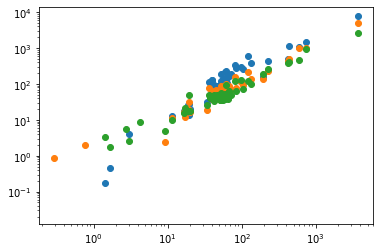

In [15]:
y1 = mfcc_df.iloc[4].transpose()
y2 = mfcc_df.iloc[74].transpose()
y3 = mfcc_df.iloc[104].transpose()
x = mfcc_df.iloc[5].transpose()

plt.scatter(x, y1)
plt.scatter(x, y2)
plt.scatter(x, y3)
plt.yscale('log')
plt.xscale('log')




Text(0, 0.5, 'Accuracy')

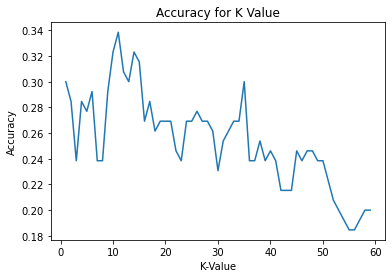

In [16]:
# optimize k 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

error = []

X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(accuracy_score(y_pred, y_test))
    
plt.plot(range(1,60), error)
plt.title('Accuracy for K Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')

In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = SVC(kernel='rbf', C=1, probability=True)

X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)

x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_pred, y_test)

0.6076923076923076

In [20]:
pd.DataFrame(confusion_matrix(y_test, y_pred))


,0,1,2,3,4,5,6
0,9,5,0,0,0,1,2
1,1,9,0,0,2,1,0
2,1,1,11,1,2,3,2
3,0,2,2,11,0,0,3
4,1,3,4,0,11,2,2
5,0,1,0,0,1,18,1
6,1,1,1,2,0,2,10


In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)

x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy_score(y_pred, y_test)

0.5615384615384615

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

clf = MLPClassifier(hidden_layer_sizes=(100,), alpha=5, activation='relu', max_iter=200, solver='adam')

X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)


scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

clf.out_activation_ = 'softmax'


clf.fit(X_train_normalized, y_train)

MLPClassifier(alpha=5)

In [26]:
y_pred = clf.predict(X_test_normalized)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

0.7307692307692307

In [29]:
from ShazamAPI import Shazam
from pydub import AudioSegment
import time


def ShazamSong(file_path):
    audio = AudioSegment.from_file(file_path)
    start_time = 30000  
    end_time = len(audio)
    trimmed_audio = audio[start_time:end_time]

    mp3_file_content_to_recognize = trimmed_audio.export(format='mp3').read()
    shazam = Shazam(mp3_file_content_to_recognize)
    recognize_generator = shazam.recognizeSong()

    try:
        result = next(recognize_generator)
        artist = result[1]['track']['subtitle']
        return artist
    except (StopIteration, KeyError):
        return None

In [ ]:
from ShazamAPI import Shazam
from pydub import AudioSegment
import time


def ShazamSong(file_path):
    audio = AudioSegment.from_file(file_path)
    start_time = 30000  
    end_time = len(audio)
    trimmed_audio = audio[start_time:end_time]

    mp3_file_content_to_recognize = trimmed_audio.export(format='mp3').read()
    shazam = Shazam(mp3_file_content_to_recognize)
    recognize_generator = shazam.recognizeSong()

    try:
        result = next(recognize_generator)
        artist = result[1]['track']['subtitle']
        return artist
    except (StopIteration, KeyError):
        return None

In [ ]:
# Create a neural network classifier using tensorflow and keras for .wav data
# the classes are Drake, Juice WRLD, Kanye West, Lil Uzi Vert, The Weeknd, Travis Scott, XXXTentacion
# use a variety of features, such as MFCCs, spectral contrast, and chroma features

# Create a neural network classifier using tensorflow and keras for .wav data
# the classes are Drake, Juice WRLD, Kanye West, Lil Uzi Vert, The Weeknd, Travis Scott, XXXTentacion
# use a variety of features, such as MFCCs, spectral contrast, and chroma features


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy.io import wavfile

# Function to load and preprocess .wav data
def load_and_preprocess_data(data_dir):
    labels = []
    features = []

    # Loop through each class directory
    artists = os.listdir(data_dir)

    for i, artist in enumerate(artists):
        artist_dir = os.path.join(data_dir, artist)

        # Loop through each .wav file in the class directory
        for filename in os.listdir(artist_dir):
            file_path = os.path.join(artist_dir, filename)

            # Load .wav file
            _, wav_data = wavfile.read(file_path)

            # Store data and label
            features.append(wav_data)
            labels.append(i)

    # Convert lists to numpy arrays
    features = np.array(features)
    labels = np.array(labels)

    # Convert labels to one-hot encoding
    labels = to_categorical(labels, num_classes=len(artists))

    return features, labels

# Load and preprocess data
data_dir = "Real Audio"
features, labels = load_and_preprocess_data(data_dir)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Define the neural network architecture
model = models.Sequential([
    layers.Flatten(input_shape=(len(features[0]), )),  # Adjust input shape based on your data
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(os.listdir(data_dir)), activation='softmax')  # Output layer with softmax activation for multiclass classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Save the model
model.save('wav_classifier_model.h5')


: 